# Day 5:30 daily statistics

O objetivo de hoje é modelar usando regressão polinomial multipla. Os modelos múltiplos são aqueles em que duas ou mais variáveis independentes influenciam na variação da variável dependente. Estes modelos podem ser de grau 1, 2 ou de maiores graus. Mostrarei uma aplicação simples de uma regressão polinomial de grau 2, com apenas duas variáveis independentes, simuladas no R apenas para termos ideia de sua aplicação. Um modelo polinomial de grau 2, tem a seguinte forma: $\hat{z}=\beta_0+\beta_1x+\beta_2y+\beta_3x^2+\beta_4xy+\beta_5y^2+\epsilon$, tendo isso em vista, abaixo será apresentado uma descrição dos passos para realizar uma modelagem em um modelo polinomial.

In [1]:
x= rep(1:10,10)                      #criando valores para x             
y=as.numeric(gl(10,10))              #criando valores para y
set.seed(2020)                       #fixando a sememente inicial em 2020, sem essa linha a cada iteração será
                                     #apresentado um resultado diferente
z=rnorm(100,30,15)                   #Criando 100 valores para z com média 30 e variância 15

base= data.frame(x,y,z)              #reunindo os valores x, y e z em um data frame

modelo = z~x+y+I(x^2)+I(x*y)+I(y^2)  #Polinômio de grau 2, criado seguindo a equação apresentada no texto acima

ajuste =lm(                          #Ajuste da regressao
        modelo,                      #Modelo descrito z~x+y+I(x^2)+I(x*y)+I(y^2)
        base)                        #Base de dados

ajuste                               #Apresentando os resultados do ajuste exponencial de grau 2



Call:
lm(formula = modelo, data = base)

Coefficients:
(Intercept)            x            y       I(x^2)     I(x * y)       I(y^2)  
    34.0073      -1.9540       1.7797       0.1138       0.0632      -0.2002  


In [2]:
#Apresentando um teste para os coeficientes encontrados no ajuste anterior
summary(ajuste)


Call:
lm(formula = modelo, data = base)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.012 -10.137   0.033   8.868  45.597 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  34.0073    10.8309   3.140  0.00226 **
x            -1.9540     2.8908  -0.676  0.50073   
y             1.7797     2.8908   0.616  0.53962   
I(x^2)        0.1138     0.2354   0.484  0.62974   
I(x * y)      0.0632     0.2073   0.305  0.76112   
I(y^2)       -0.2003     0.2354  -0.851  0.39702   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.1 on 94 degrees of freedom
Multiple R-squared:  0.01489,	Adjusted R-squared:  -0.03751 
F-statistic: 0.2842 on 5 and 94 DF,  p-value: 0.9207


O objetivo aqui foi apenas mostrar os passos para realizar um estudo em um modelo de regressão polinomial de grau 2, não se interessando em encontrar o melhor modelo para ser ajustado. No entanto, se fosse necessário uma análise no modelo encontrado, poderemos dizer que somente o ***intercepto*** poderá ser considerado significativo para o modelo polinomial de grau 2, em outras palavras, o modelo estimado não é considerado significativo.


Um dos grande problemas dos modelos polinomiais é a determinação do número de coeficientes que serão incorporados na equação de forma manual. Se tivermos um problema que apresente $d=10$ variáveis explicativas, teríamos que incorporar $\frac{(10+1)\cdot (10+2)}{2}=66$ termos no modelo. A fórmula para o número de termos é apresentada por: $\frac{(d+1)\cdot (d+2)}{2}$. 

Conversando com o professor Hidelbrando surgiu uma pergunta: e se tivessemos um modelo com $15$ variáveis, então teríamos que inserir manualmente 136 termos no modelo? Neste caso a criação de uma função no R poderia diminuir o trabalho de inserção manual dos termos na equação polinomial.

In [3]:
#função para criação de um modelo polinomial de grau n

hidel=function(d){
    ntermos=(((d+1)*(d+2))/2)-1
    termos =rep("vazio",ntermos)
    cont=1
    for(j in 1:d)
        for(i in j:0)
            {
            termos[cont]=paste("I(x^", i, "*y^",(j-i),")",sep="")
            cont=cont+1
        }
        f=as.formula(paste("z~",paste(termos,collapse="+")))
    return(f)
}

Para uma aplicação real, usarei a seguinte tabela extraída do livro **Estatístia Aplicada** de Fonseca, Martins e Toledo, página 139.

In [4]:
#Entrada de dados
y=c(30542, 60983, 96114, 133041, 145584, 191194, 174191, 183707, 185187, 224574,225362,278473,349519,416047,516038,608985,729135)

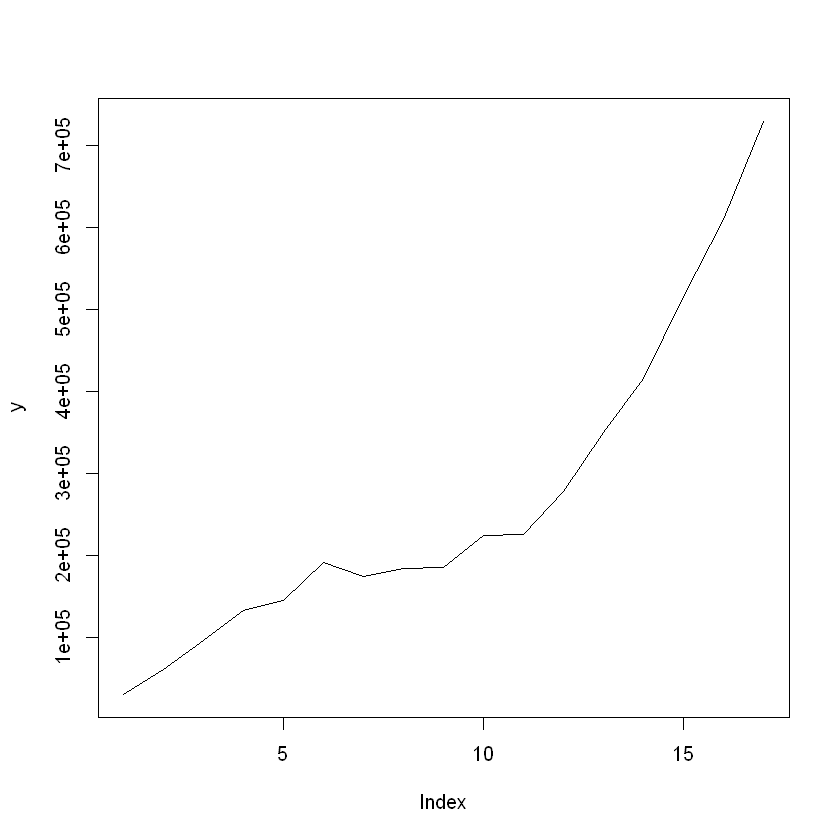

In [5]:
#gráfico para o comportamento de y
plot(y,type="l")

Portanto, para a base de dados *y*, tentaremos ajustar alguns modelos:

+ a) Ajuste Linear
+ b) Ajuste Polinomial


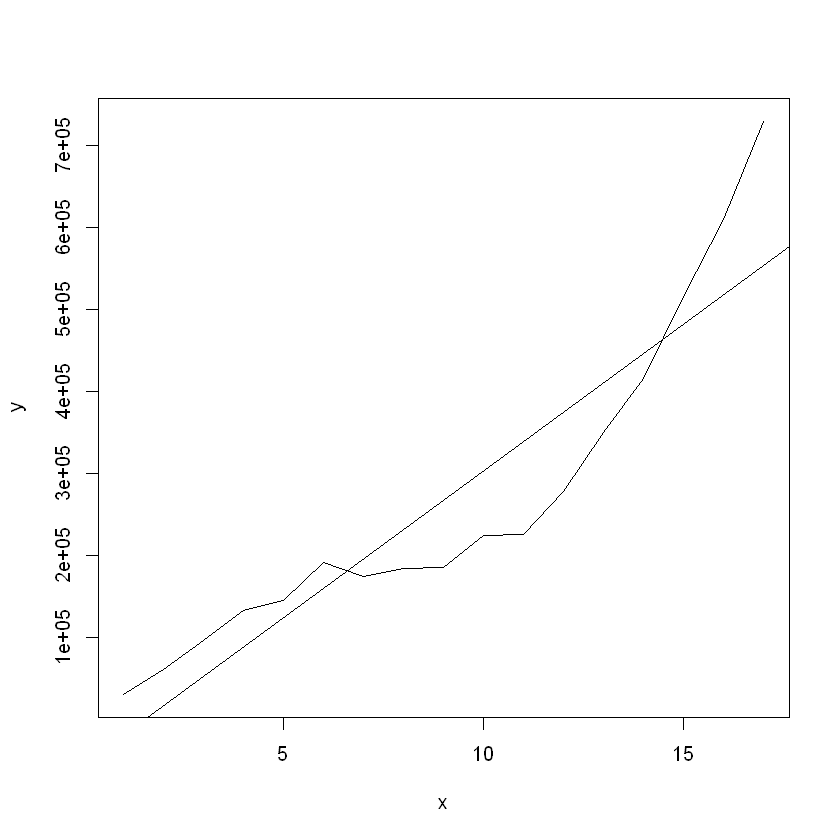

In [6]:
#ajuste linear

x=c(1:17)                     #Entrada de dados de x
plot(x,y,type="l")
abline(lm(y~x))               #Modelagem linear simples


In [7]:
# Análise do modelo estimado

ajuste=lm(y~x)              #Realizando o ajuste do modelo
summary(ajuste)             #Apresentando o resultado do ajuste




Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-113678  -60993   20957   43563  175681 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -54051      39823  -1.357    0.195    
x              35736       3886   9.195 1.49e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 78500 on 15 degrees of freedom
Multiple R-squared:  0.8493,	Adjusted R-squared:  0.8393 
F-statistic: 84.55 on 1 and 15 DF,  p-value: 1.489e-07


Observando o p-valor de 1,489e-07, conclui-se pela significância do modelo, sendo ainda capaz de explicar 84,93% as variações que ocorrem no processo.

In [8]:
# Aplicação do modelo polinomial.
# foi necessário a criação de mais duas outras variáveis para ser utilizado o modelo polinomial de grau 2.
x1=seq(from=-8,to=8,by=1)        #x1 varia de -8 até 8
y=c(30542, 60983, 96114, 133041, 145584, 191194, 174191, 183707, 185187, 224574,225362,278473,349519,416047,516038,608985,729135)
x2=x1^2             #x2 é o valor de x1 ao quadrado

dados=data.frame(x1,y)


In [9]:

#Modelo polinomial usado
modelo= y~x1+I(x1^2)                           
ajuste=lm(modelo,dados)
summary(ajuste)



Call:
lm(formula = modelo, data = dados)

Residuals:
   Min     1Q Median     3Q    Max 
-65690 -33064   -309  35367  73787 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 198840.5    16566.2  12.003 9.33e-09 ***
x1           35735.6     2247.8  15.898 2.35e-10 ***
I(x1^2)       2863.7      515.7   5.553 7.11e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 45400 on 14 degrees of freedom
Multiple R-squared:  0.953,	Adjusted R-squared:  0.9462 
F-statistic: 141.8 on 2 and 14 DF,  p-value: 5.101e-10


O modelo encontrado foi $\hat{y}=198840.5+35735.6x_1+2863.7x_1^2$, com os parâmetros significativos para o modelo ao nível de 5% de significância. O coeficiente de determinação encontrado para o modelo é de 95,3%.

In [10]:
#Anova para o modelo encontrado
anova(ajuste)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x1,1,521029021799,521029021799,252.74363,2.352772e-10
I(x1^2),1,63572139992,63572139992,30.83792,7.114555e-05
Residuals,14,28860891291,2061492235,NA,NA


Como visto anteriormente a ANOVA, aponta para a significância dos parâmetros para compor o modelo e consequentemente na significância do modelo encontrado.

In [11]:
#Uma tabela com os valores previsto e estimados é apresentado a seguir:

preditos=predict(ajuste)
residuos=residuals(ajuste)
resultado=data.frame(x1,y,preditos,residuos)
resultado


x1,y,preditos,residuos
-8,30542,96232.25,-65690.2497
-7,60983,89012.43,-28029.4306
-6,96114,87520.00,8594.0015
-5,133041,91754.95,41286.0467
-4,145584,101717.30,43866.7049
-3,191194,117407.02,73786.9760
-2,174191,138824.14,35366.8602
-1,183707,165968.64,17738.3573
0,185187,198840.53,-13653.5325
1,224574,237439.81,-12865.8093


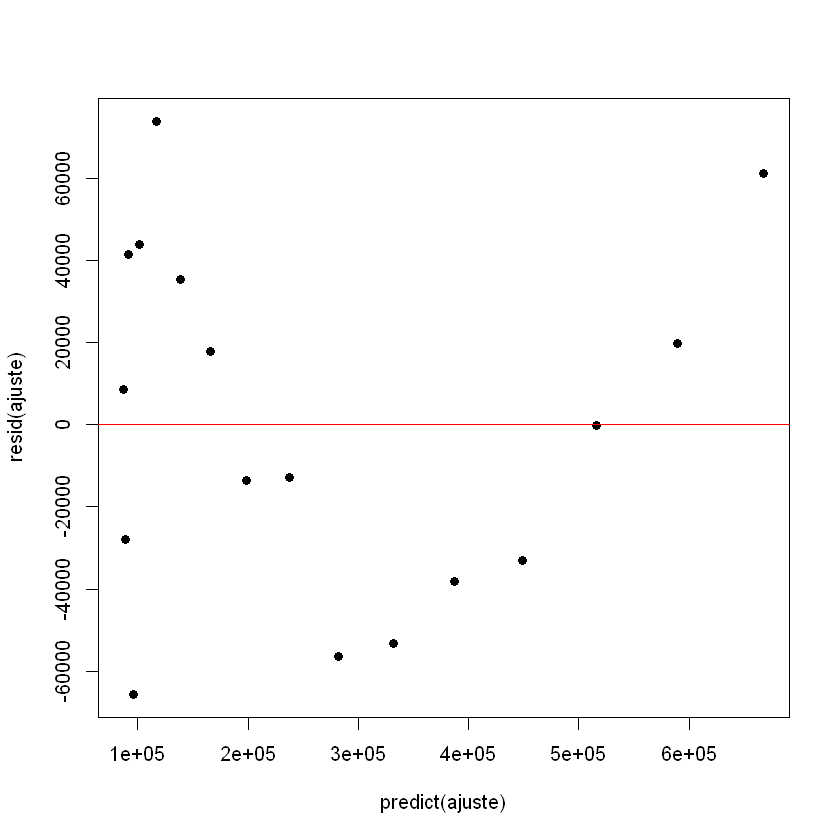

In [12]:
#Gráficos

plot(resid(ajuste)~predict(ajuste),pch=16)
abline(0,0,col="red")

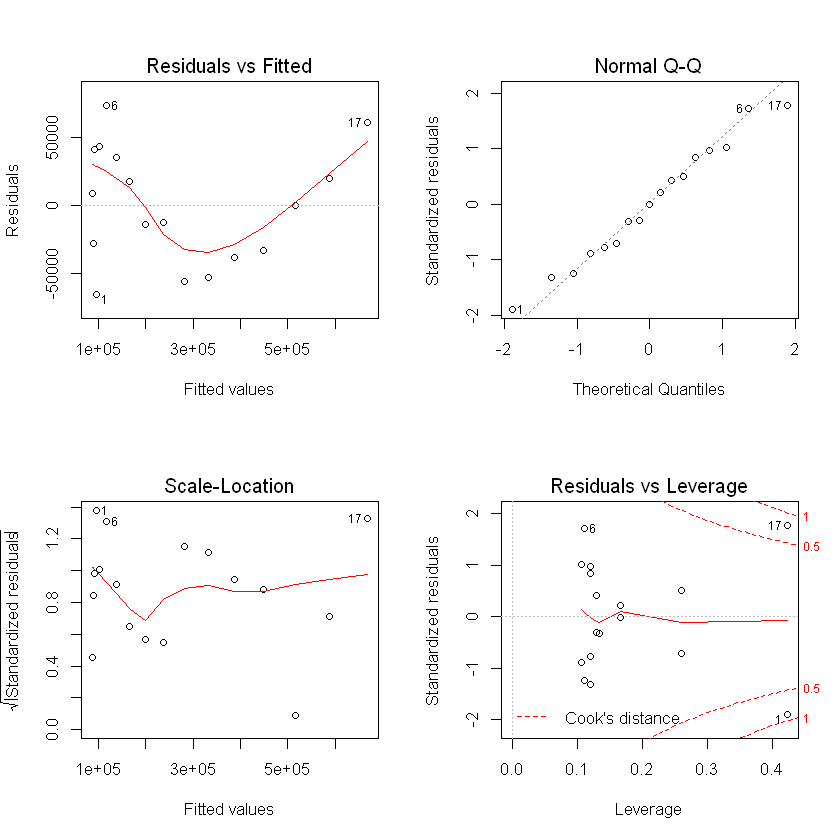

In [13]:
par(mfrow=c(2,2))
plot(ajuste)